# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# The Data

In [2]:
df=pd.read_excel('Titanic.xls')

In [3]:
df.head().append(df.tail())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [4]:
df.shape

(891, 12)

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
import missingno as msno

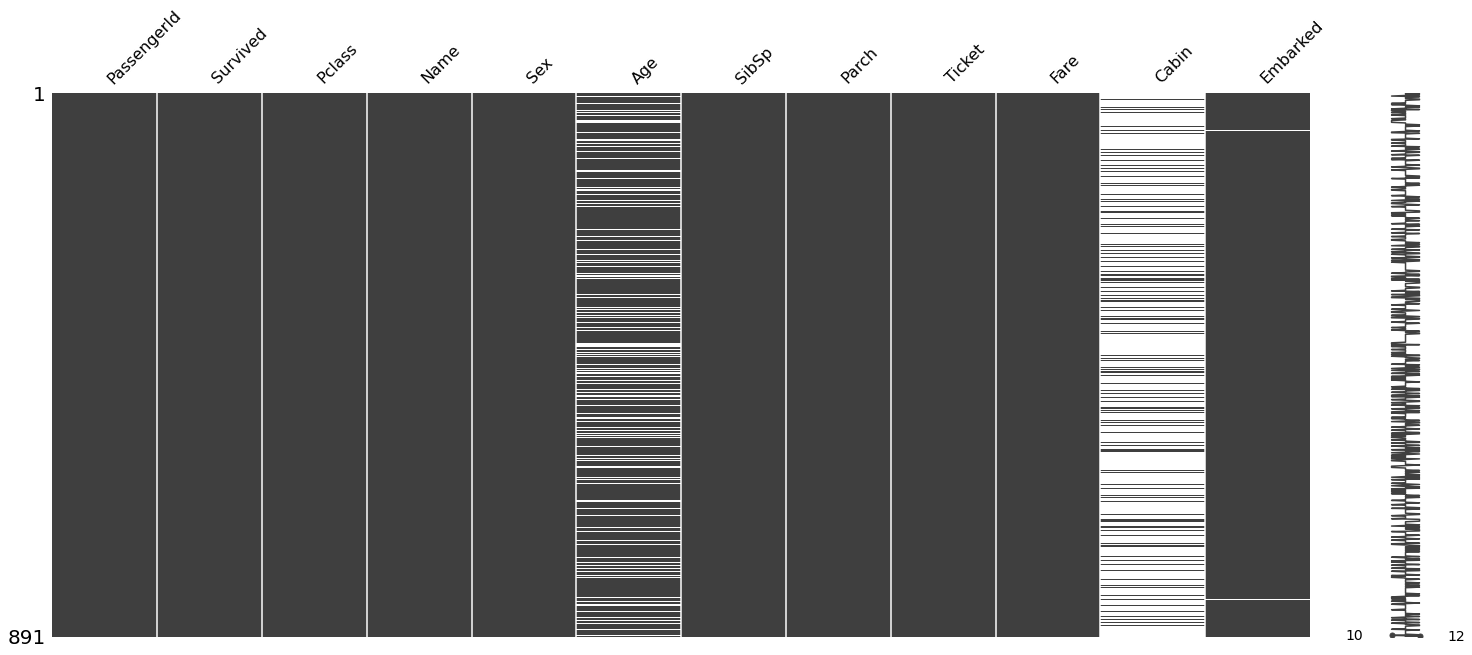

In [8]:
msno.matrix(df)

In [9]:
df['Age']=df['Age'].fillna(df['Age'].mean()).astype('int')
df.drop('Cabin',axis=1,inplace=True)

In [10]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

# EDA

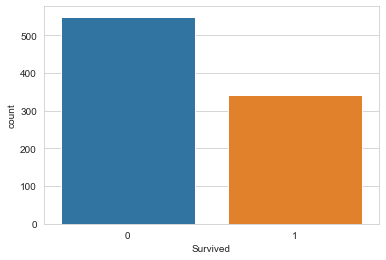

In [11]:
sns.set_style('whitegrid')
sns.countplot(df['Survived'])

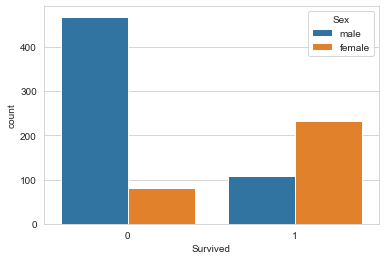

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df)

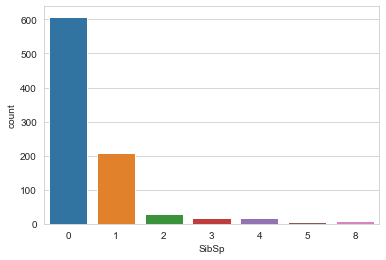

In [13]:
sns.countplot(x='SibSp',data=df)

# Survival Rate

In [14]:
df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [15]:
df.pivot_table('Survived',columns='Pclass')
df.pivot_table('Survived',index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


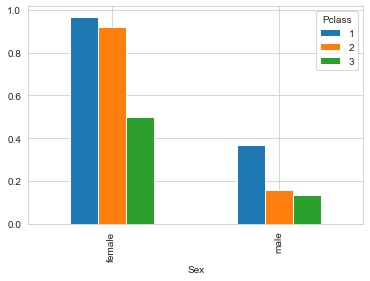

In [16]:
df.pivot_table('Survived',index='Sex', columns='Pclass').plot(kind='bar')

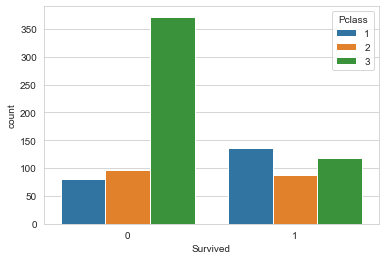

In [17]:
sns.countplot(x='Survived',hue='Pclass',data=df)

In [18]:
age=pd.cut(df['Age'],[0,18,80])
df.pivot_table('Survived',['Sex',age],'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.487805
       (18, 80]  0.975904  0.903226  0.495050
male   (0, 18]   0.750000  0.500000  0.200000
       (18, 80]  0.350427  0.086022  0.121622

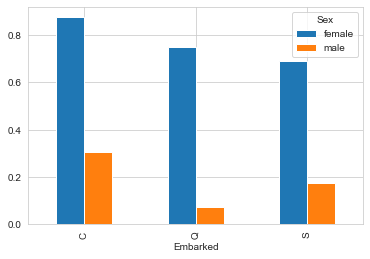

In [19]:
df.pivot_table('Survived','Embarked','Sex').plot(kind='bar')

In [20]:
a=df.corr()

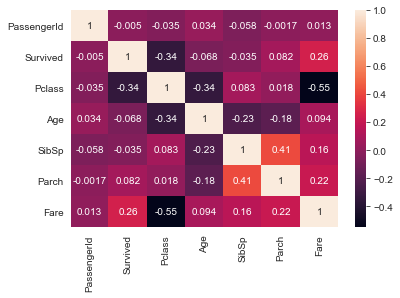

In [21]:
sns.heatmap(a,annot=True)

In [22]:
df['Embarked']=df['Embarked'].fillna(method='ffill')

In [23]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [24]:
genders = {"male": 0, "female": 1}
df['Sex'] = df['Sex'].map(genders)

In [25]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age              int32
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Embarked']=le.fit_transform(df.Embarked)

In [27]:
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Embarked']]

In [28]:
y = df['Survived']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Model Building

In [32]:
def models(X_train,Y_train):
    from sklearn.linear_model import LogisticRegression
    log=LogisticRegression()
    log.fit(X_train,Y_train)
    
    
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier(n_neighbors=8)
    knn.fit(X_train,Y_train)
    
    
    from sklearn.svm import SVC
    svc_lin=SVC(kernel='poly')
    svc_lin.fit(X_train,Y_train)
    
    
    from sklearn.svm import SVC
    svc_rbf=SVC(kernel='rbf')
    svc_rbf.fit(X_train,Y_train)
    
    
    from sklearn.tree import DecisionTreeClassifier
    tree=DecisionTreeClassifier(criterion='entropy')
    tree.fit(X_train,Y_train)
    
    
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators=500)
    forest.fit(X_train,Y_train)
    
        
        
        #print trainning accuracy
    print('[0]Logistic Regression Training Accuracy:',log.score(X_train,Y_train))
    print('[1]knn Training Accuracy:' ,knn.score(X_train,Y_train))  
    print('[2]svc_rbf Training Accuracy:', svc_rbf.score(X_train,Y_train))
    print('[3]svc-lin Training Accuracy:' ,svc_lin.score(X_train,Y_train)) 
    print('[4]decision tee Training Accuracy:', tree.score(X_train,Y_train))  
    print('[5]random forest Training Accuracy:', forest.score(X_train,Y_train)) 
    
    return log, knn, svc_rbf, svc_lin, tree, forest
  

In [33]:
model=models(X_train,Y_train)

[0]Logistic Regression Training Accuracy: 0.7993579454253612
[1]knn Training Accuracy: 0.841091492776886
[2]svc_rbf Training Accuracy: 0.8507223113964687
[3]svc-lin Training Accuracy: 0.8362760834670947
[4]decision tee Training Accuracy: 0.9406099518459069
[5]random forest Training Accuracy: 0.9406099518459069


In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [45]:
for i in range(len(model)):
    cm=confusion_matrix(Y_test,model[i].predict(X_test))
    ac=accuracy_score(Y_test,model[i].predict(X_test))
    
    print(model[i],ac)
    
    print(cm)
    

LogisticRegression() 0.8134328358208955
[[137  20]
 [ 30  81]]
KNeighborsClassifier(n_neighbors=8) 0.8059701492537313
[[143  14]
 [ 38  73]]
SVC() 0.8171641791044776
[[146  11]
 [ 38  73]]
SVC(kernel='poly') 0.7910447761194029
[[135  22]
 [ 34  77]]
DecisionTreeClassifier(criterion='entropy') 0.7425373134328358
[[129  28]
 [ 41  70]]
RandomForestClassifier(n_estimators=500) 0.8059701492537313
[[136  21]
 [ 31  80]]


In [36]:
cm

array([[136,  21],
       [ 31,  80]], dtype=int64)